In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from collections import Counter
from pylab import rcParams
from sklearn.neighbors import NearestNeighbors
from sklearn import metrics
rcParams['figure.figsize'] = 12, 7
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [3]:
X = pd.read_csv ("C:/Users/Lenovo/Desktop/BITCOIN/all_seasons.csv")
print (X)

       Unnamed: 0          player_name team_abbreviation   age  player_height  \
0               0        Travis Knight               LAL  22.0         213.36   
1               1            Matt Fish               MIA  27.0         210.82   
2               2         Matt Bullard               HOU  30.0         208.28   
3               3         Marty Conlon               BOS  29.0         210.82   
4               4      Martin Muursepp               DAL  22.0         205.74   
...           ...                  ...               ...   ...            ...   
11695       11695  Matthew Dellavedova               CLE  30.0         190.50   
11696       11696     Maurice Harkless               SAC  28.0         200.66   
11697       11697            Max Strus               MIA  25.0         195.58   
11698       11698    Marcus Morris Sr.               LAC  31.0         203.20   
11699       11699         Aaron Gordon               DEN  25.0         203.20   

       player_weight       

In [3]:
X.isna().sum()

Unnamed: 0           0
player_name          0
team_abbreviation    0
age                  0
player_height        0
player_weight        0
college              0
country              0
draft_year           0
draft_round          0
draft_number         0
gp                   0
pts                  0
reb                  0
ast                  0
net_rating           0
oreb_pct             0
dreb_pct             0
usg_pct              0
ts_pct               0
ast_pct              0
season               0
dtype: int64

In [5]:
dbscan_X = X[['player_height', 'reb']]
dbscan_X = dbscan_X.values.astype('float64', copy=False)
dbscan_X

array([[213.36,   4.5 ],
       [210.82,   0.8 ],
       [208.28,   1.6 ],
       ...,
       [195.58,   1.1 ],
       [203.2 ,   4.1 ],
       [203.2 ,   5.7 ]])

In [5]:
neigh = NearestNeighbors(n_neighbors=4)
nbrs = neigh.fit(dbscan_X)
distances, indices = nbrs.kneighbors(dbscan_X)

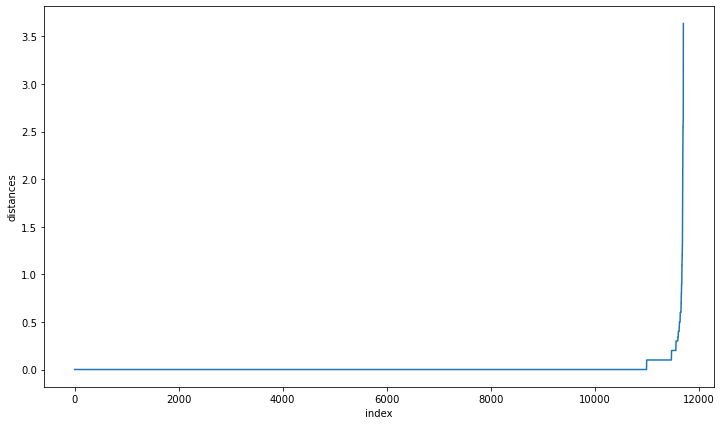

In [6]:
distances = np.sort(distances, axis=0)
distances = distances[:,2]
plt.plot(distances)
plt.xlabel("index")
plt.ylabel("distances")
plt.show()

In [40]:
range_eps = [2.54]
for i in range_eps :
    print("eps value is "+str(i))
    model = DBSCAN(eps= i, min_samples=4).fit(dbscan_X)
    zero = np.zeros_like(model.labels_, dtype=bool)
    zero[model.core_sample_indices_] = True
    labels = model.labels_
    print(set(labels))
    silhouette_avg = metrics.silhouette_score(dbscan_X, labels)
    print("For eps value =" +str(i), labels,
         "The average is :",silhouette_avg)

eps value is 2.54
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, -1}
For eps value =2.54 [0 1 1 ... 2 2 2] The average is : 0.3882232972867212


In [49]:
min_samples = [3, 4]
for i in min_samples :
    print("min_samples values is ="+str(i))
    model= DBSCAN(eps=0.1, min_samples=i).fit(dbscan_X)
    zero = np.zeros_like(model.labels_, dtype=bool)
    zero[model.core_sample_indices_] = True
    labels = set([label for label in model.labels_ if label >= 0])
    print(set(labels))
    print("for min_samples_calue ="+str(i), "total no of clusters are "+str(len(set(labels))))

min_samples values is =3
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216,

In [42]:
range_n_clusters = []

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters= n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(dbscan_X)
    
    silhouette_avg = silhouette_score(dbscan_X,cluster_labels)
    print("for n_clusters = ", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
    sample_silhouette_values = silhouette_samples(dbscan_X, cluster_labels)

for n_clusters =  544 The average silhouette_score is : 0.6075749842986854
for n_clusters =  11 The average silhouette_score is : 0.41197972123526666


In [141]:
model = DBSCAN(eps = 2.54, min_samples = 4).fit(dbscan_X)
zero = np.zeros_like(model.labels_, dtype=bool)
zero[model.core_sample_indices_] = True
labels = model.labels_

In [142]:
metrics.silhouette_score(dbscan_X, labels)

0.3882232972867212

In [143]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

11

In [144]:
n_noise_ = list(labels).count(-1)
n_noise_

7

In [145]:
clusters = Counter(model.labels_)
print(clusters)
print("number of clusters", n_clusters_)

Counter({2: 4135, 1: 3581, 4: 1984, 0: 1020, 3: 900, 10: 25, 7: 16, 8: 14, 6: 8, -1: 7, 5: 5, 9: 5})
number of clusters 11


In [101]:
metrics.homogeneity_score(X['player_height'],labels)

E:\anaconda\lib\site-packages\sklearn\metrics\cluster\_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


0.556710212102431

In [102]:
metrics.homogeneity_score(X['reb'],labels)

E:\anaconda\lib\site-packages\sklearn\metrics\cluster\_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


0.03267821302195362

In [103]:
metrics.completeness_score(X['player_height'],labels)

E:\anaconda\lib\site-packages\sklearn\metrics\cluster\_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


0.9988450562153692

In [104]:
metrics.completeness_score(X['reb'],labels)

E:\anaconda\lib\site-packages\sklearn\metrics\cluster\_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


0.09756432785353401

In [105]:
metrics.v_measure_score(X['player_height'],labels)

E:\anaconda\lib\site-packages\sklearn\metrics\cluster\_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


0.7149437302918358

In [106]:
metrics.v_measure_score(X['reb'],labels)

E:\anaconda\lib\site-packages\sklearn\metrics\cluster\_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


0.048958318342229905

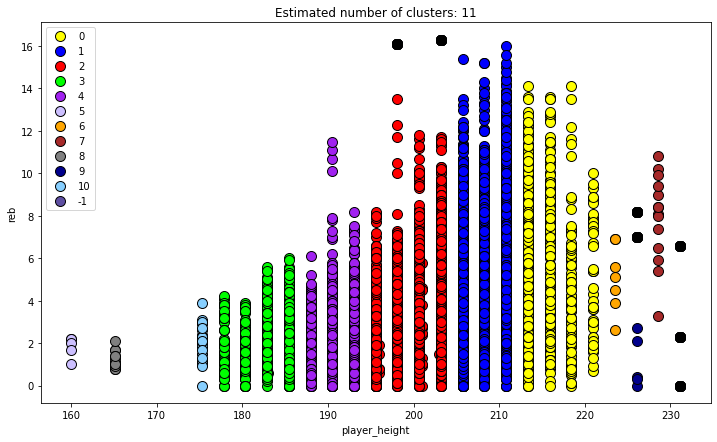

In [148]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    #if k == -1:
        #col = [0, 0, 0]
    if k == 0:
        col = [1, 1, 0]
    elif k == 1:
        col = [0, 0, 1]
    elif k == 2:
        col = [1, 0, 0]
    elif k == 3:
        col = [0, 1, 0]
    elif k == 4:
        col = [0.63, 0.13, 0.94]
    elif k == 5:
        col = [0.80, 0.75, 1]
    elif k == 6:
        col = [1, 0.65, 0]
    elif k == 7:
        col = [0.65, 0.16, 0.16]
    elif k == 8:
        col = [0.50, 0.50, 0.50]
    elif k == 9:
        col = [0, 0, 0.55]
    elif k == 10:
        col = [0.53, 0.81, 1]

    label1 = labels == k

    xy = dbscan_X[label1 & zero]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=10,
    )
    
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0]
        
    xy = dbscan_X[label1 & ~zero]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=10,
    )
plt.legend(unique_labels)  
plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.xlabel('player_height')
plt.ylabel('reb')
plt.show()

In [130]:
dbscan_X1 = X[['player_height', 'pts']]
dbscan_X1 = dbscan_X1.values.astype('float64', copy=False)
dbscan_X1

array([[213.36,   4.8 ],
       [210.82,   0.3 ],
       [208.28,   4.5 ],
       ...,
       [195.58,   6.1 ],
       [203.2 ,  13.4 ],
       [203.2 ,  12.4 ]])

In [9]:
neigh = NearestNeighbors(n_neighbors=4)
nbrs = neigh.fit(dbscan_X1)
distances, indices = nbrs.kneighbors(dbscan_X1)

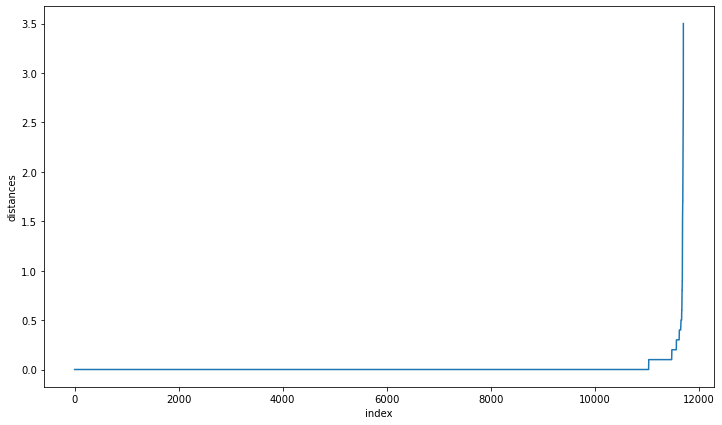

In [9]:
distances = np.sort(distances, axis=0)
distances = distances[:,2]
plt.plot(distances)
plt.xlabel("index")
plt.ylabel("distances")
plt.show()

In [122]:
range_eps = [0.1]
for i in range_eps :
    print("eps value is "+str(i))
    model = DBSCAN(eps= i, min_samples=4).fit(dbscan_X1)
    zero = np.zeros_like(model.labels_, dtype=bool)
    zero[model.core_sample_indices_] = True
    labels = model.labels_
    print(set(labels))
    silhouette_avg = metrics.silhouette_score(dbscan_X1, labels)
    print("For eps value =" +str(i), labels,
         "The average is :",silhouette_avg)

eps value is 0.1
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 21

In [121]:
min_samples = [3, 4]
for i in min_samples :
    print("min_samples values is ="+str(i))
    model= DBSCAN(eps=2.54, min_samples=i).fit(dbscan_X1)
    zero = np.zeros_like(model.labels_, dtype=bool)
    zero[model.core_sample_indices_] = True
    labels = set([label for label in model.labels_ if label >= 0])
    print(set(labels))
    print("for min_samples_calue ="+str(i), "total no of clusters are "+str(len(set(labels))))

min_samples values is =3
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}
for min_samples_calue =3 total no of clusters are 13
min_samples values is =4
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}
for min_samples_calue =4 total no of clusters are 13


In [44]:
range_n_clusters = [803,13]

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters= n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(dbscan_X1)
    
    silhouette_avg = silhouette_score(dbscan_X1,cluster_labels)
    print("for n_clusters = ", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
    sample_silhouette_values = silhouette_samples(dbscan_X1, cluster_labels)

for n_clusters =  803 The average silhouette_score is : 0.5694014120442495
for n_clusters =  13 The average silhouette_score is : 0.34303459693078636


In [157]:
model = DBSCAN(eps = 2.54, min_samples = 4).fit(dbscan_X1)
zero = np.zeros_like(model.labels_, dtype=bool)
zero[model.core_sample_indices_] = True
labels = model.labels_

In [158]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

13

In [159]:
n_noise_ = list(labels).count(-1)
n_noise_

16

In [160]:
clusters = Counter(model.labels_)
print(clusters)
print("number of clusters", n_clusters_)

Counter({2: 4134, 1: 3581, 4: 1984, 0: 1020, 3: 898, 10: 22, -1: 16, 6: 14, 9: 9, 8: 6, 5: 4, 12: 4, 7: 4, 11: 4})
number of clusters 13


In [118]:
metrics.homogeneity_score(X['player_height'],labels)

E:\anaconda\lib\site-packages\sklearn\metrics\cluster\_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


0.991557635810223

In [119]:
metrics.homogeneity_score(X['pts'],labels)

E:\anaconda\lib\site-packages\sklearn\metrics\cluster\_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


0.04519200295944053

In [112]:
metrics.completeness_score(X['player_height'],labels)

E:\anaconda\lib\site-packages\sklearn\metrics\cluster\_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


0.37698735176599135

In [113]:
metrics.completeness_score(X['pts'],labels)

E:\anaconda\lib\site-packages\sklearn\metrics\cluster\_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


0.6337101793333428

In [114]:
metrics.v_measure_score(X['player_height'],labels)

E:\anaconda\lib\site-packages\sklearn\metrics\cluster\_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


0.5303707572661326

In [126]:
metrics.v_measure_score(X['pts'],labels)

E:\anaconda\lib\site-packages\sklearn\metrics\cluster\_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


0.6712959680262313

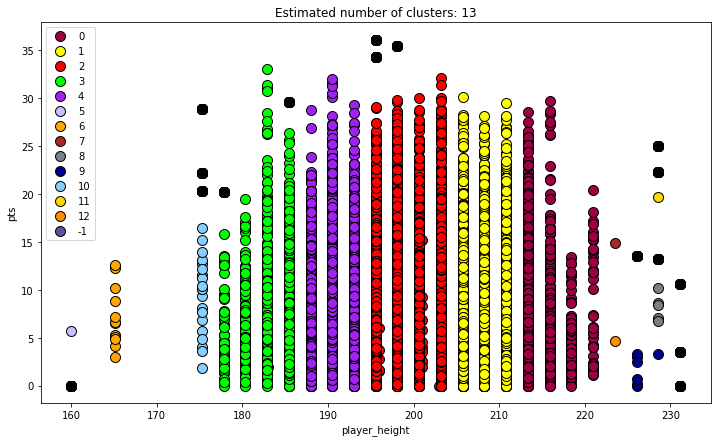

In [137]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    #if k == -1:
        #col = [0, 0, 0]
    if k == 1:
        col = [1, 1, 0]
    elif k == 1:
        col = [0, 0, 1]
    elif k == 2:
        col = [1, 0, 0]
    elif k == 3:
        col = [0, 1, 0]
    elif k == 4:
        col = [0.63, 0.13, 0.94]
    elif k == 5:
        col = [0.80, 0.75, 1]
    elif k == 6:
        col = [1, 0.65, 0]
    elif k == 7:
        col = [0.65, 0.16, 0.16]
    elif k == 8:
        col = [0.50, 0.50, 0.50]
    elif k == 9:
        col = [0, 0, 0.55]
    elif k == 10:
        col = [0.53, 0.81, 1]
    elif k == 11:
        col = [1, 0.84, 0]
    elif k == 12:
        col = [1, 0.55, 0]

    label1 = labels == k

    xy = dbscan_X1[label1 & zero]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=10,
    )
    
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0]
        
    xy = dbscan_X1[label1 & ~zero]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=10,
    )
plt.legend(unique_labels)
plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.xlabel('player_height')
plt.ylabel('pts')
plt.show()

In [5]:
dbscan_X2 = X[['player_height', 'reb']]
dbscan_X2 = dbscan_X2.values.astype('float64', copy=False)
dbscan_X2

array([[213.36,   0.5 ],
       [210.82,   0.  ],
       [208.28,   0.9 ],
       ...,
       [195.58,   0.6 ],
       [203.2 ,   1.  ],
       [203.2 ,   3.2 ]])

In [12]:
neigh = NearestNeighbors(n_neighbors=4)
nbrs = neigh.fit(dbscan_X2)
distances, indices = nbrs.kneighbors(dbscan_X2)

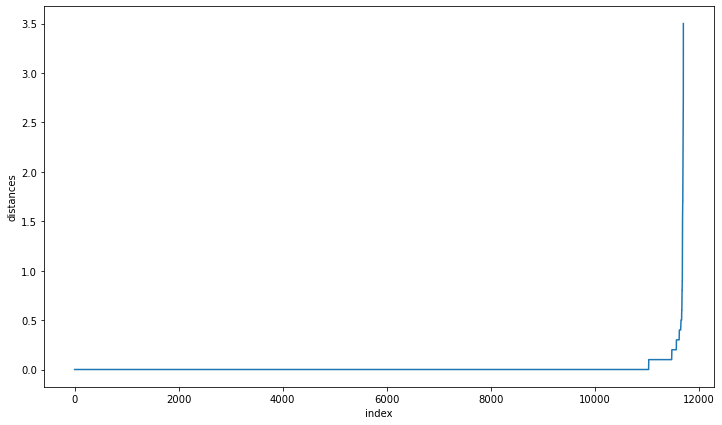

In [13]:
distances = np.sort(distances, axis=0)
distances = distances[:,2]
plt.plot(distances)
plt.xlabel("index")
plt.ylabel("distances")
plt.show()

In [38]:
range_eps = [2.54]
for i in range_eps :
    print("eps value is "+str(i))
    model = DBSCAN(eps= i, min_samples=4).fit(dbscan_X2)
    zero = np.zeros_like(model.labels_, dtype=bool)
    zero[model.core_sample_indices_] = True
    labels = model.labels_
    print(set(labels))
    silhouette_avg = metrics.silhouette_score(dbscan_X2, labels)
    print("For eps value =" +str(i), labels,
         "The average is :",silhouette_avg)

eps value is 2.54
{0, 1, 2, 3, 4, 5, 6, 7, 8, -1}
For eps value =2.54 [0 1 1 ... 2 2 2] The average is : 0.4474785739369151


In [51]:
min_samples = [3, 4]
for i in min_samples :
    print("min_samples values is ="+str(i))
    model= DBSCAN(eps=0.1, min_samples=i).fit(dbscan_X2)
    zero = np.zeros_like(model.labels_, dtype=bool)
    zero[model.core_sample_indices_] = True
    labels = set([label for label in model.labels_ if label >= 0])
    print(set(labels))
    print("for min_samples_calue ="+str(i), "total no of clusters are "+str(len(set(labels))))

min_samples values is =3
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216,

In [45]:
range_n_clusters = [444,9]

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters= n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(dbscan_X2)
    
    silhouette_avg = silhouette_score(dbscan_X2,cluster_labels)
    print("for n_clusters = ", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
    sample_silhouette_values = silhouette_samples(dbscan_X2, cluster_labels)

for n_clusters =  444 The average silhouette_score is : 0.7298066783007097
for n_clusters =  9 The average silhouette_score is : 0.4821576782297272


In [15]:
model = DBSCAN(eps = 0.1, min_samples = 3).fit(dbscan_X2)
zero = np.zeros_like(model.labels_, dtype=bool)
zero[model.core_sample_indices_] = True
labels = model.labels_

In [7]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

444

In [8]:
n_noise_ = list(labels).count(-1)
n_noise_

475

In [153]:
clusters = Counter(model.labels_)
print(clusters)
print("number of clusters", n_clusters_)

Counter({2: 4137, 1: 3581, 4: 1984, 0: 1020, 3: 900, 5: 34, 8: 25, 7: 13, 6: 5, -1: 1})
number of clusters 9


In [16]:
metrics.homogeneity_score(X['player_height'],labels)

E:\anaconda\lib\site-packages\sklearn\metrics\cluster\_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


0.9697915783277755

In [10]:
metrics.homogeneity_score(X['reb'],labels)

E:\anaconda\lib\site-packages\sklearn\metrics\cluster\_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


0.7421941490982191

In [17]:
metrics.completeness_score(X['player_height'],labels)

E:\anaconda\lib\site-packages\sklearn\metrics\cluster\_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


0.48227781281212795

In [12]:
metrics.completeness_score(X['reb'],labels)

E:\anaconda\lib\site-packages\sklearn\metrics\cluster\_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


0.547600367991252

In [18]:
metrics.v_measure_score(X['player_height'],labels)

E:\anaconda\lib\site-packages\sklearn\metrics\cluster\_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


0.6441964332191868

In [14]:
metrics.v_measure_score(X['reb'],labels)

E:\anaconda\lib\site-packages\sklearn\metrics\cluster\_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


0.6302178894112105

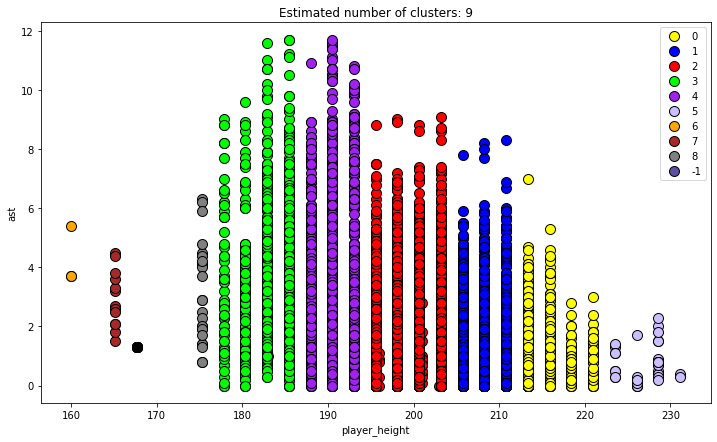

In [156]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    #if k == -1:
        #col = [0, 0, 0]
    if k == 0:
        col = [1, 1, 0]
    elif k == 1:
        col = [0, 0, 1]
    elif k == 2:
        col = [1, 0, 0]
    elif k == 3:
        col = [0, 1, 0]
    elif k == 4:
        col = [0.63, 0.13, 0.94]
    elif k == 5:
        col = [0.80, 0.75, 1]
    elif k == 6:
        col = [1, 0.65, 0]
    elif k == 7:
        col = [0.65, 0.16, 0.16]
    elif k == 8:
        col = [0.50, 0.50, 0.50]
    elif k == 9:
        col = [0, 0, 0.55]

    label1 = labels == k

    xy = dbscan_X2[label1 & zero]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=10,
    )
    
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0]
        
    xy = dbscan_X2[label1 & ~zero]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=10,
    )
plt.legend(unique_labels)  
plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.xlabel('player_height')
plt.ylabel('reb')
plt.show()